In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [3]:
df = pd.read_csv('NIFTY 50_Historical_PR_02071990to14072024.csv')

In [4]:
print(df.head(10))

  Index Name         Date      Open      High       Low     Close
0   NIFTY 50  12 Jul 2024  24387.95   24592.2  24331.15  24502.15
1   NIFTY 50  11 Jul 2024  24396.55  24402.65  24193.75  24315.95
2   NIFTY 50  10 Jul 2024  24459.85  24461.05   24141.8  24324.45
3   NIFTY 50  09 Jul 2024     24351   24443.6   24331.9  24433.20
4   NIFTY 50  08 Jul 2024  24329.45   24344.6  24240.55  24320.55
5   NIFTY 50  05 Jul 2024  24213.35     24363  24168.85  24323.85
6   NIFTY 50  04 Jul 2024  24369.95     24401     24281  24302.15
7   NIFTY 50  03 Jul 2024  24291.75  24309.15   24207.1  24286.50
8   NIFTY 50  02 Jul 2024  24228.75  24236.35   24056.4  24123.85
9   NIFTY 50  01 Jul 2024  23992.95     24164   23992.7  24141.95


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8263 entries, 0 to 8262
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Index Name  8263 non-null   object 
 1   Date        8263 non-null   object 
 2   Open        8263 non-null   object 
 3   High        8263 non-null   object 
 4   Low         8263 non-null   object 
 5   Close       8263 non-null   float64
dtypes: float64(1), object(5)
memory usage: 387.5+ KB
None


In [6]:
df = df[::-1]
df = df.reset_index()

In [7]:
df = df[2500:]
df

,index,Index Name,Date,Open,High,Low,Close
2500,5762,NIFTY 50,10 May 2001,1149.10,1151.60,1139.25,1144.95
2501,5761,NIFTY 50,11 May 2001,1144.10,1146.85,1136.90,1140.50
2502,5760,NIFTY 50,14 May 2001,1140.45,1146.25,1134.05,1140.80
2503,5759,NIFTY 50,15 May 2001,1140.75,1147.75,1096.25,1145.30
2504,5758,NIFTY 50,16 May 2001,1147.10,1163.15,1146.05,1151.15
...,...,...,...,...,...,...,...
8258,4,NIFTY 50,08 Jul 2024,24329.45,24344.6,24240.55,24320.55
8259,3,NIFTY 50,09 Jul 2024,24351,24443.6,24331.9,24433.20
8260,2,NIFTY 50,10 Jul 2024,24459.85,24461.05,24141.8,24324.45
8261,1,NIFTY 50,11 Jul 2024,24396.55,24402.65,24193.75,24315.95


In [8]:
df = df.drop('index',axis=1)

In [9]:
df = df.set_index('Date')

In [10]:
df = df.drop('Index Name',axis=1)

In [11]:
print(df)

                 Open      High       Low     Close
Date                                               
10 May 2001   1149.10   1151.60   1139.25   1144.95
11 May 2001   1144.10   1146.85   1136.90   1140.50
14 May 2001   1140.45   1146.25   1134.05   1140.80
15 May 2001   1140.75   1147.75   1096.25   1145.30
16 May 2001   1147.10   1163.15   1146.05   1151.15
...               ...       ...       ...       ...
08 Jul 2024  24329.45   24344.6  24240.55  24320.55
09 Jul 2024     24351   24443.6   24331.9  24433.20
10 Jul 2024  24459.85  24461.05   24141.8  24324.45
11 Jul 2024  24396.55  24402.65  24193.75  24315.95
12 Jul 2024  24387.95   24592.2  24331.15  24502.15

[5763 rows x 4 columns]


In [12]:
df.isnull().sum()

Open     0
High     0
Low      0
Close    0
dtype: int64

In [13]:
print(df.describe())

              Close
count   5763.000000
mean    7582.486179
std     5510.933212
min      854.200000
25%     3460.000000
50%     5882.250000
75%    10607.350000
max    24502.150000


In [14]:
print(df.dtypes)

Open      object
High      object
Low       object
Close    float64
dtype: object


In [15]:
df['Open'] = pd.to_numeric(df['Open'])
df['High'] = pd.to_numeric(df['High'])
df['Low'] = pd.to_numeric(df['Low'])
print(df.dtypes)

Open     float64
High     float64
Low      float64
Close    float64
dtype: object


In [16]:
print(df.head())

                Open     High      Low    Close
Date                                           
10 May 2001  1149.10  1151.60  1139.25  1144.95
11 May 2001  1144.10  1146.85  1136.90  1140.50
14 May 2001  1140.45  1146.25  1134.05  1140.80
15 May 2001  1140.75  1147.75  1096.25  1145.30
16 May 2001  1147.10  1163.15  1146.05  1151.15


In [17]:
print(df.describe())

               Open          High           Low         Close
count   5763.000000   5763.000000   5763.000000   5763.000000
mean    7586.437567   7630.373417   7531.747553   7582.486179
std     5514.959321   5532.584697   5486.804483   5510.933212
min      853.000000    877.000000    849.950000    854.200000
25%     3456.425000   3489.450000   3399.275000   3460.000000
50%     5884.800000   5917.800000   5837.200000   5882.250000
75%    10619.075000  10661.875000  10561.575000  10607.350000
max    24459.850000  24592.200000  24331.900000  24502.150000


In [65]:
df_train = df.iloc[:,3:4].values
y_test = df.iloc[5:,0:].values
print(df_train,"\n --???>>>",y_test)

[[ 1144.95]
 [ 1140.5 ]
 [ 1140.8 ]
 ...
 [24324.45]
 [24315.95]
 [24502.15]] 
 --???>>> [[ 1151.2   1179.    1150.6   1174.95]
 [ 1175.    1187.65  1169.2   1172.8 ]
 [ 1172.95  1182.65  1166.7   1169.45]
 ...
 [24459.85 24461.05 24141.8  24324.45]
 [24396.55 24402.65 24193.75 24315.95]
 [24387.95 24592.2  24331.15 24502.15]]


In [19]:
df_train.shape

(5763, 1)

In [20]:
sc = MinMaxScaler()
df_train = sc.fit_transform(df_train)
df_train.shape

(5763, 1)

In [45]:
x_train = []
y_train = []
lookback = 5
for i in range(lookback,5763):
    x_train.append(df_train[i - lookback:i,0])
    y_train.append(df_train[i,0])
print(x_train)
x_train , y_train = np.array(x_train),np.array(y_train)

[array([0.01229493, 0.01210676, 0.01211944, 0.01230974, 0.01255711]), array([0.01210676, 0.01211944, 0.01230974, 0.01255711, 0.01356354]), array([0.01211944, 0.01230974, 0.01255711, 0.01356354, 0.01347263]), array([0.01230974, 0.01255711, 0.01356354, 0.01347263, 0.01333097]), array([0.01255711, 0.01356354, 0.01347263, 0.01333097, 0.01327388]), array([0.01356354, 0.01347263, 0.01333097, 0.01327388, 0.01373903]), array([0.01347263, 0.01333097, 0.01327388, 0.01373903, 0.01385532]), array([0.01333097, 0.01327388, 0.01373903, 0.01385532, 0.01356143]), array([0.01327388, 0.01373903, 0.01385532, 0.01356143, 0.01433528]), array([0.01373903, 0.01385532, 0.01356143, 0.01433528, 0.01455729]), array([0.01385532, 0.01356143, 0.01433528, 0.01455729, 0.01367349]), array([0.01356143, 0.01433528, 0.01455729, 0.01367349, 0.01326542]), array([0.01433528, 0.01455729, 0.01367349, 0.01326542, 0.01242602]), array([0.01455729, 0.01367349, 0.01326542, 0.01242602, 0.01154434]), array([0.01367349, 0.01326542, 0.

In [51]:
x_train.shape[0]

5758

In [53]:
x_train.shape[1]

5

In [55]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(5758, 5, 1)

In [67]:

model = Sequential()

model.add(LSTM(units=100, return_sequences= True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences= True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences= True))
model.add(Dropout(0.2))


model.add(LSTM(units=100, return_sequences= False))
model.add(Dropout(0.2))


model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

C:\Users\harsi\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [69]:
hist = model.fit(x_train, y_train, epochs=20, batch_size=32, verbose=2)

Epoch 1/20
180/180 - 17s - 95ms/step - loss: 0.0092
Epoch 2/20
180/180 - 3s - 17ms/step - loss: 9.8214e-04
Epoch 3/20
180/180 - 3s - 18ms/step - loss: 9.2179e-04
Epoch 4/20
180/180 - 3s - 17ms/step - loss: 6.7250e-04
Epoch 5/20
180/180 - 3s - 17ms/step - loss: 6.8413e-04
Epoch 6/20
180/180 - 3s - 16ms/step - loss: 6.7426e-04
Epoch 7/20
180/180 - 3s - 18ms/step - loss: 6.3744e-04
Epoch 8/20
180/180 - 3s - 18ms/step - loss: 6.2181e-04
Epoch 9/20
180/180 - 3s - 17ms/step - loss: 5.7615e-04
Epoch 10/20
180/180 - 3s - 17ms/step - loss: 5.7056e-04
Epoch 11/20
180/180 - 3s - 18ms/step - loss: 5.8678e-04
Epoch 12/20
180/180 - 3s - 19ms/step - loss: 5.7063e-04
Epoch 13/20
180/180 - 3s - 19ms/step - loss: 5.5175e-04
Epoch 14/20
180/180 - 3s - 17ms/step - loss: 5.1099e-04
Epoch 15/20
180/180 - 3s - 17ms/step - loss: 5.1236e-04
Epoch 16/20
180/180 - 3s - 17ms/step - loss: 5.4927e-04
Epoch 17/20
180/180 - 3s - 17ms/step - loss: 4.8179e-04
Epoch 18/20
180/180 - 3s - 18ms/step - loss: 5.0111e-04
Epoc

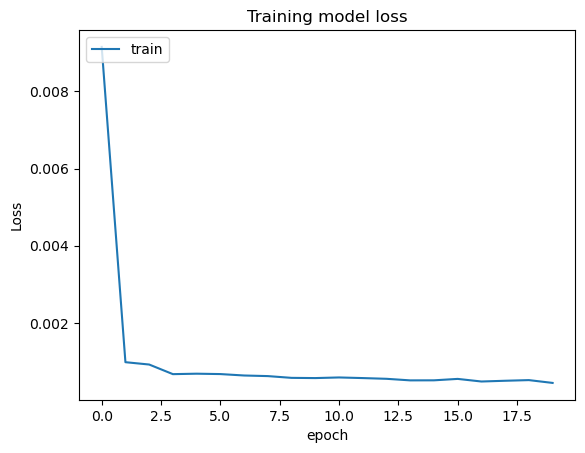

In [70]:

plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

In [71]:
# FOr testing we test from 0 to 100 data
x_test = x_train
print(x_test)

[[[0.01229493]
  [0.01210676]
  [0.01211944]
  [0.01230974]
  [0.01255711]]

 [[0.01210676]
  [0.01211944]
  [0.01230974]
  [0.01255711]
  [0.01356354]]

 [[0.01211944]
  [0.01230974]
  [0.01255711]
  [0.01356354]
  [0.01347263]]

 ...

 [[0.99088082]
  [0.99154261]
  [0.99246023]
  [0.99232069]
  [0.99708431]]

 [[0.99154261]
  [0.99246023]
  [0.99232069]
  [0.99708431]
  [0.99248561]]

 [[0.99246023]
  [0.99232069]
  [0.99708431]
  [0.99248561]
  [0.99212617]]]


In [72]:
y_predict = model.predict(x_test)
y_predict

180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step


array([[0.01478635],
       [0.01484941],
       [0.01506746],
       ...,
       [0.9696524 ],
       [0.97037005],
       [0.9709127 ]], dtype=float32)

In [73]:
predicted_price = sc.inverse_transform(y_predict)

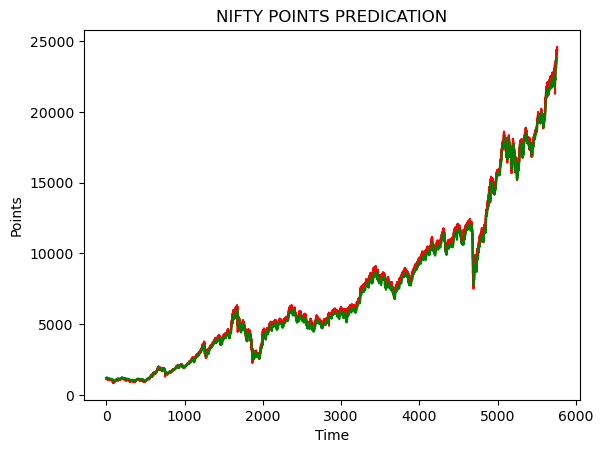

In [81]:
plt.plot(y_test,color='red',label='Actual Points')
plt.plot(predicted_price,color='green',label='Predicted Points')
plt.title("NIFTY POINTS PREDICATION")
plt.xlabel('Time')
plt.ylabel('Points')
plt.show()